<a href="https://colab.research.google.com/github/get2aakash/DeepLearning_/blob/main/RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

11493376/11490434 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


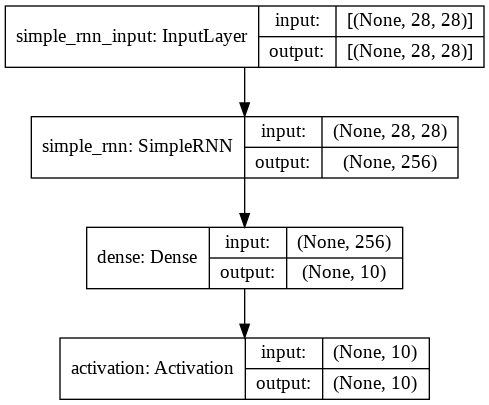

In [2]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
dropout=dropout,
input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [3]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
_, acc = model.evaluate(x_test,
y_test,
batch_size=batch_size,
verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 16s 27ms/step - loss: 0.7690 - accuracy: 0.7733
Epoch 2/20
469/469 [==============================] - 13s 27ms/step - loss: 0.3406 - accuracy: 0.8994
Epoch 3/20
469/469 [==============================] - 13s 27ms/step - loss: 0.2483 - accuracy: 0.9255
Epoch 4/20
469/469 [==============================] - 13s 28ms/step - loss: 0.2016 - accuracy: 0.9395
Epoch 5/20
469/469 [==============================] - 12s 26ms/step - loss: 0.1720 - accuracy: 0.9488
Epoch 6/20
469/469 [==============================] - 12s 26ms/step - loss: 0.1549 - accuracy: 0.9535
Epoch 7/20
469/469 [==============================] - 12s 25ms/step - loss: 0.1379 - accuracy: 0.9585
Epoch 8/20
469/469 [==============================] - 12s 26ms/step - loss: 0.1294 - accuracy: 0.9604
Epoch 9/20
469/469 [==============================] - 13s 28ms/step - loss: 0.1199 - accuracy: 0.9638
Epoch 10/20
469/469 [==============================] - 12s 27ms/step - loss: 0.111